In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 10)
plt.rcParams["font.size"] = 11

In [3]:
file_elo = "elo_ratings.csv"
file_matches = "match_results.csv"

dir = "../comparison_results/20251229_123208_9x9_final_2"
# dir = "../comparison_results/20251229_193300"k

df_elo = pd.read_csv(dir + "/" + file_elo)
df_matches = pd.read_csv(dir + "/" + file_matches)

In [ ]:
df_elo

In [4]:
def get_model_info(run_name):
    """
    Zwraca (architektura, rozmiar, kategoria) na podstawie nazwy.
    """
    name = str(run_name).lower()

    # Architektura
    if "transformer" in name:
        arch = "Transformer"
    elif "resnet" in name:
        arch = "ResNet"
    elif "cnn" in name:
        arch = "CNN"
    else:
        arch = "Other"

    # Rozmiar
    if "_s" in name:
        size = "Small"
    elif "_l" in name:
        size = "Large"
    else:
        size = "?"

    return arch, size, f"{arch}-{size}"


# Przypisanie kategorii i składowych
df_elo[["Architecture", "Size", "Category"]] = df_elo["run_name"].apply(
    lambda x: pd.Series(get_model_info(x))
)

df_elo["draw_rate"] = df_elo["draws"] / df_elo["games_played"]

df_elo["iteration2"] = (df_elo["iteration"]) * 1024 * 256

# Definicja spójnej palety kolorów korzystając z Color Brewer 'Paired'
paired_colors = sns.color_palette("Paired")
color_map = {
    "CNN-Small": paired_colors[6],  # Jasny czerwony/pomarańcz
    "CNN-Large": paired_colors[7],  # Ciemny czerwony/pomarańcz
    "ResNet-Small": paired_colors[0],  # Jasny niebieski
    "ResNet-Large": paired_colors[1],  # Ciemny niebieski
    "Transformer-Small": paired_colors[4],  # Jasny fiolet
    "Transformer-Large": paired_colors[5],  # Ciemny fiolet
    "Other-?": paired_colors[11],  # Szary
}

# ELO

/tmp/ipykernel_226429/630326559.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_models_rating_df, x="rating", y="Category", palette=color_map)


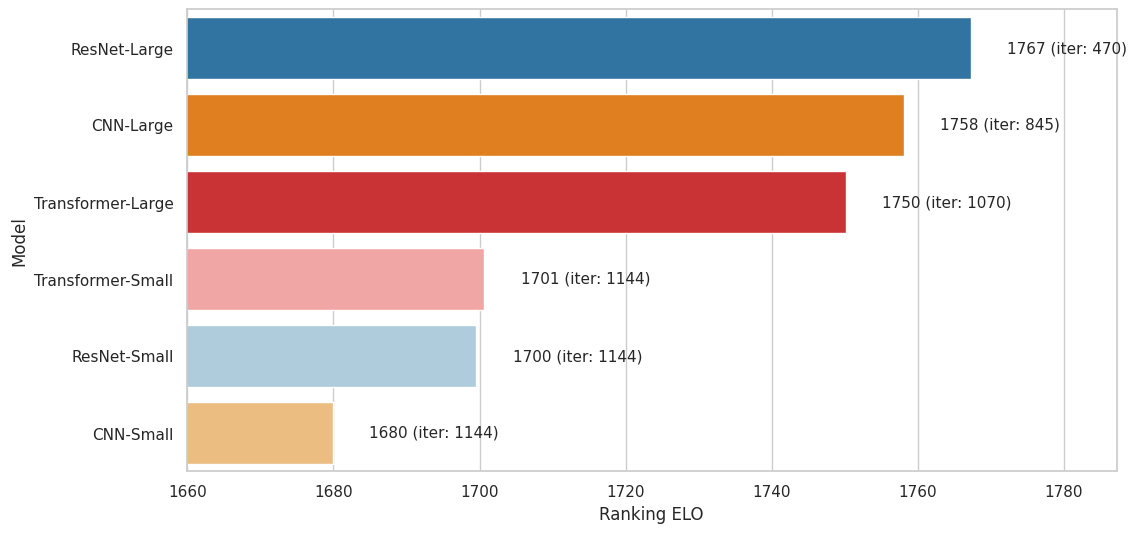

In [5]:
idx_best_rating = df_elo.groupby("Category")["rating"].idxmax()
best_models_rating_df = df_elo.loc[idx_best_rating].sort_values("rating", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=best_models_rating_df, x="rating", y="Category", palette=color_map)
for index, row in enumerate(best_models_rating_df.itertuples()):
    plt.text(row.rating + 5, index, f"{row.rating:.0f} (iter: {row.iteration})", va="center")

# plt.title("Najwyższy ranking ELO na kategorię")
plt.xlabel("Ranking ELO")
plt.ylabel("Model")
plt.xlim(
    best_models_rating_df["rating"].min() - 20, best_models_rating_df["rating"].max() + 20
)
plt.show()

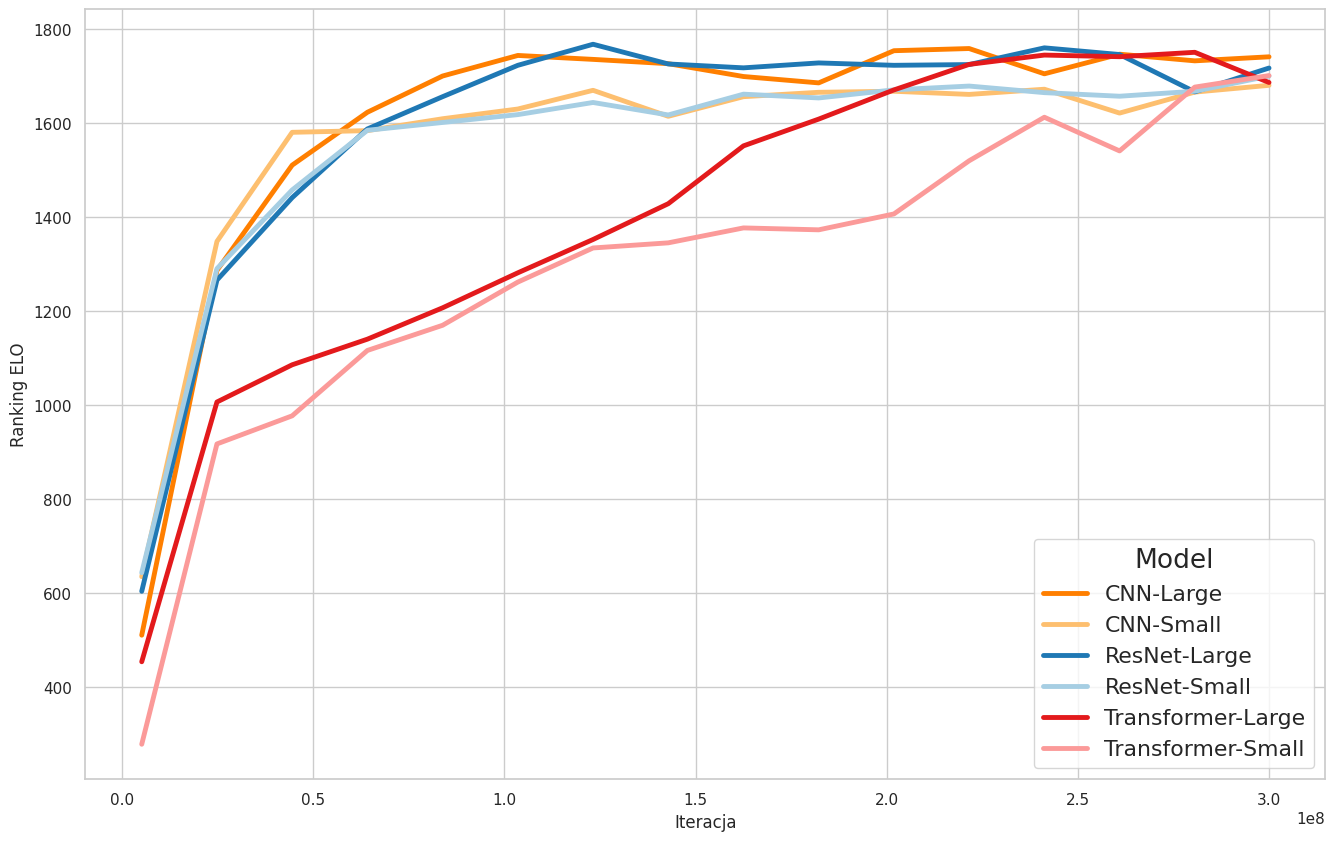

In [ ]:
plt.figure(figsize=(16, 10))
categories_order = sorted(df_elo["Category"].unique())

sns.lineplot(
    data=df_elo,
    x="iteration2",
    y="rating",
    hue="Category",
    hue_order=categories_order,
    linewidth=3.5,
    palette=color_map,
    # style="Size",
)

plt.xlabel("Kroki środowiska")
plt.ylabel("Ranking ELO")
plt.legend(
    title="Model",
    loc="lower right",
    fontsize="x-large",  # Możesz wpisać np. 14, 16 lub 'large', 'x-large'
    title_fontsize="xx-large",  # Rozmiar tytułu legendy (np. 20)
)
# plt.tight_layout()
plt.show()

# Analiza winrate

/tmp/ipykernel_222753/154905205.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_models_winrate_df, x="win_rate", y="Category", palette=color_map)


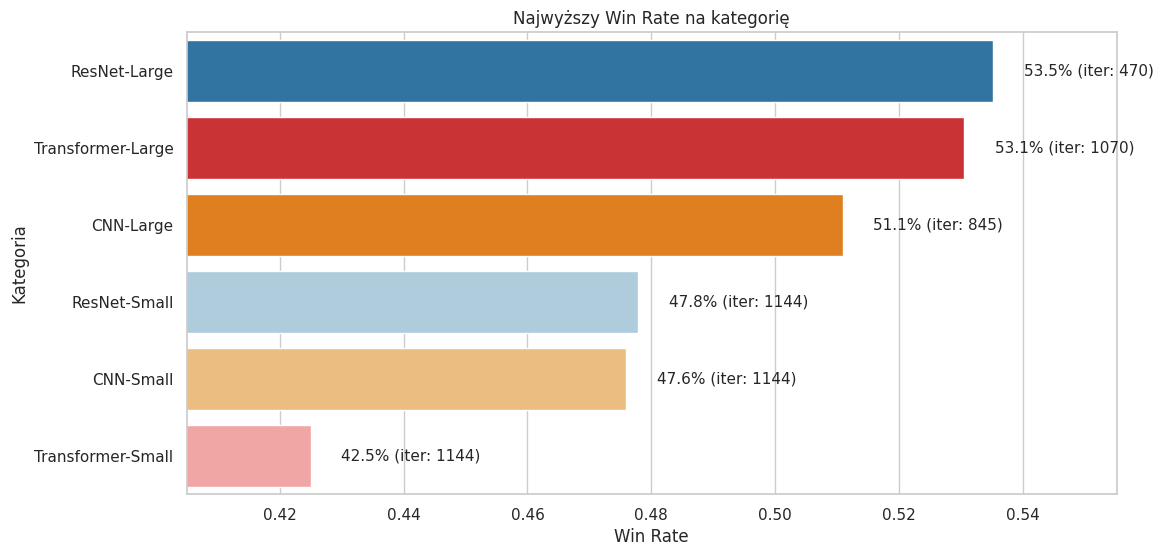

In [13]:
idx_best_winrate = df_elo.groupby("Category")["win_rate"].idxmax()
best_models_winrate_df = df_elo.loc[idx_best_rating].sort_values("win_rate", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=best_models_winrate_df, x="win_rate", y="Category", palette=color_map)
for index, row in enumerate(best_models_winrate_df.itertuples()):
    plt.text(
        row.win_rate + 0.005,
        index,
        f"{row.win_rate:.1%} (iter: {row.iteration})",
        va="center",
    )

plt.title("Najwyższy Win Rate na kategorię")
plt.xlabel("Win Rate")
plt.ylabel("Kategoria")
plt.xlim(
    best_models_winrate_df["win_rate"].min() - 0.02,
    best_models_winrate_df["win_rate"].max() + 0.02,
)
plt.show()

/tmp/ipykernel_226429/1506857848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_models_rating_df, x="draw_rate", y="Category", palette=color_map)


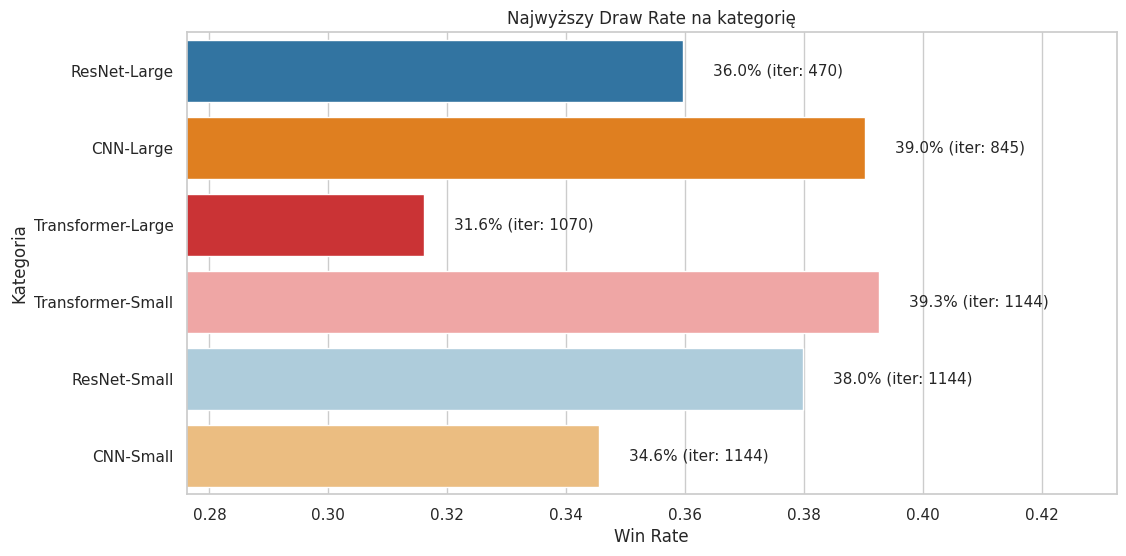

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=best_models_rating_df, x="draw_rate", y="Category", palette=color_map)
for index, row in enumerate(best_models_rating_df.itertuples()):
    plt.text(
        row.draw_rate + 0.005,
        index,
        f"{row.draw_rate:.1%} (iter: {row.iteration})",
        va="center",
    )

plt.title("Najwyższy Draw Rate na kategorię")
plt.xlabel("Win Rate")
plt.ylabel("Kategoria")
plt.xlim(
    best_models_rating_df["draw_rate"].min() - 0.04,
    best_models_rating_df["draw_rate"].max() + 0.04,
)
plt.show()

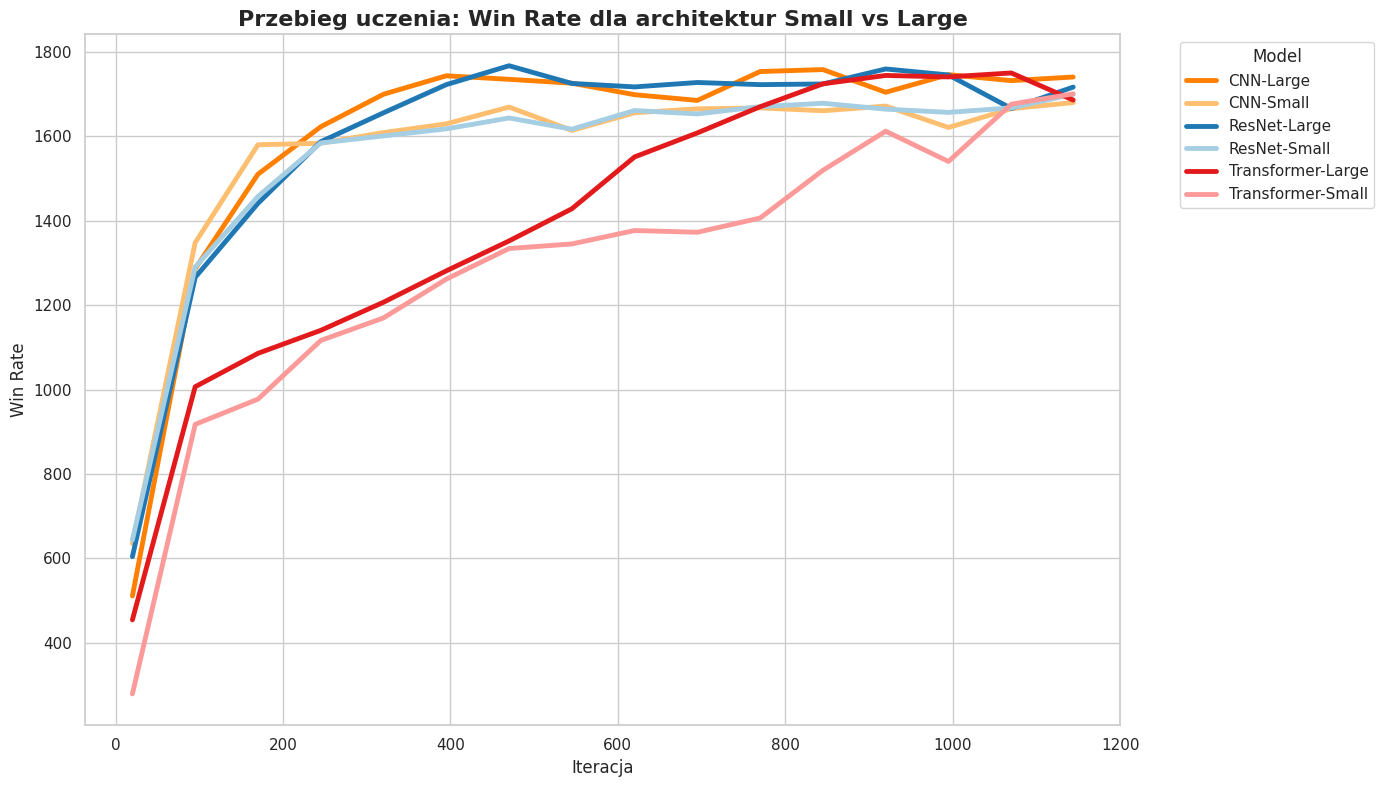

In [75]:
# ---------------------------------------------------------
# 4B. WYKRES 1B: KRZYWE UCZENIA
# ---------------------------------------------------------
plt.figure(figsize=(14, 8))
categories_order = sorted(df_elo["Category"].unique())

sns.lineplot(
    data=df_elo,
    x="iteration",
    y="rating",
    hue="Category",
    hue_order=categories_order,
    linewidth=3.5,
    palette=color_map,
)

plt.title(
    "Przebieg uczenia: Win Rate dla architektur Small vs Large", fontsize=16, fontweight="bold"
)
plt.xlabel("Iteracja", fontsize=12)
plt.ylabel("Win Rate", fontsize=12)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.savefig("learning_curves_winrate.png")
plt.show()

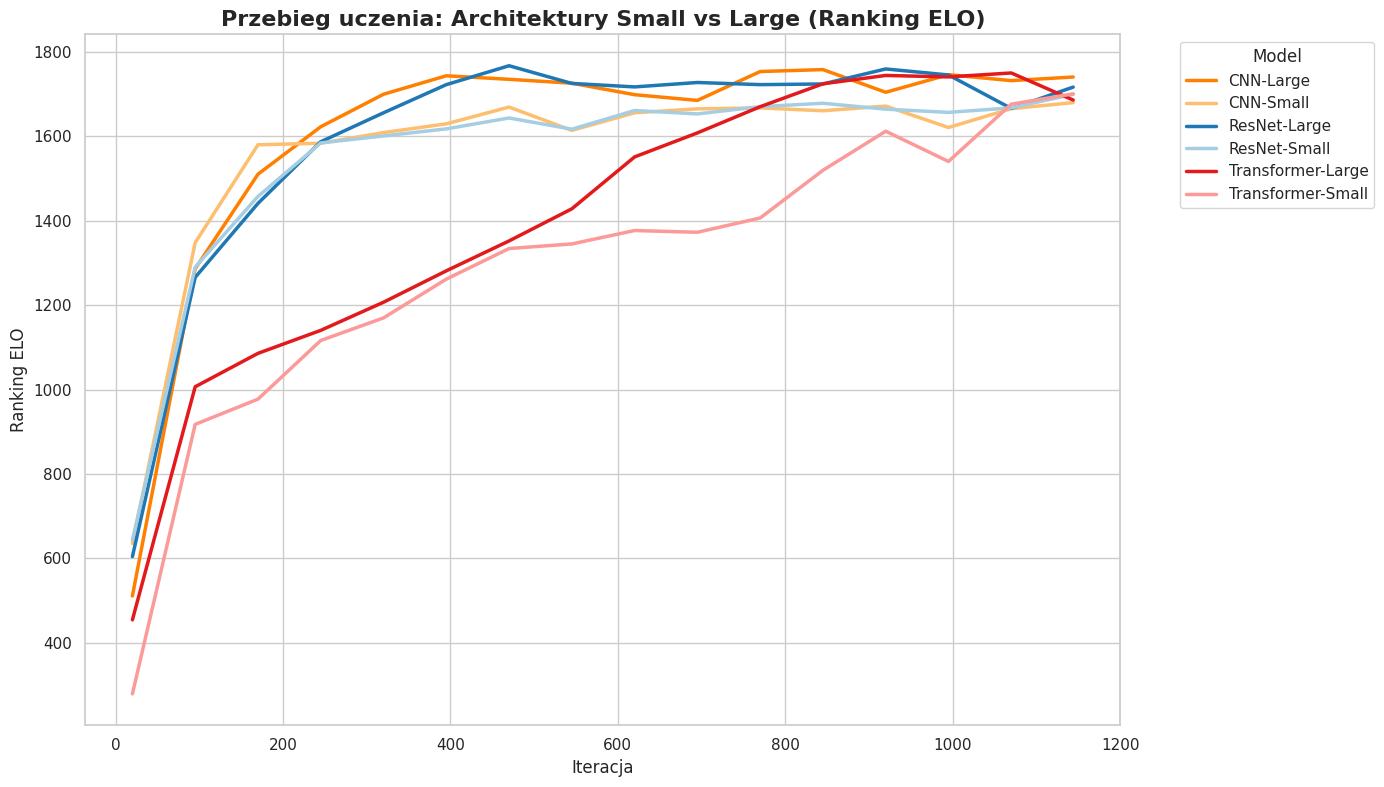

In [ ]:
# ---------------------------------------------------------
# 4. WYKRES 1: KRZYWE UCZENIA (S vs L) - ELO
# ---------------------------------------------------------

In [78]:
best_models_map = dict(
    zip(best_models_rating_df["unique_id"], best_models_rating_df["Category"])
)

# Filtrujemy mecze: Zostawiamy tylko te, gdzie OBIE strony są na liście "best_models_map"
df_champions_matches = df_matches[
    (df_matches["player1_unique_id"].isin(best_models_map.keys()))
    & (df_matches["player2_unique_id"].isin(best_models_map.keys()))
].copy()

if not df_champions_matches.empty:
    df_champions_matches["p1_cat"] = df_champions_matches["player1_unique_id"].map(
        best_models_map
    )
    df_champions_matches["p2_cat"] = df_champions_matches["player2_unique_id"].map(
        best_models_map
    )
    df_champions_matches["draw_rate"] = (
        df_champions_matches["draws"] / df_champions_matches["total_games"]
    )

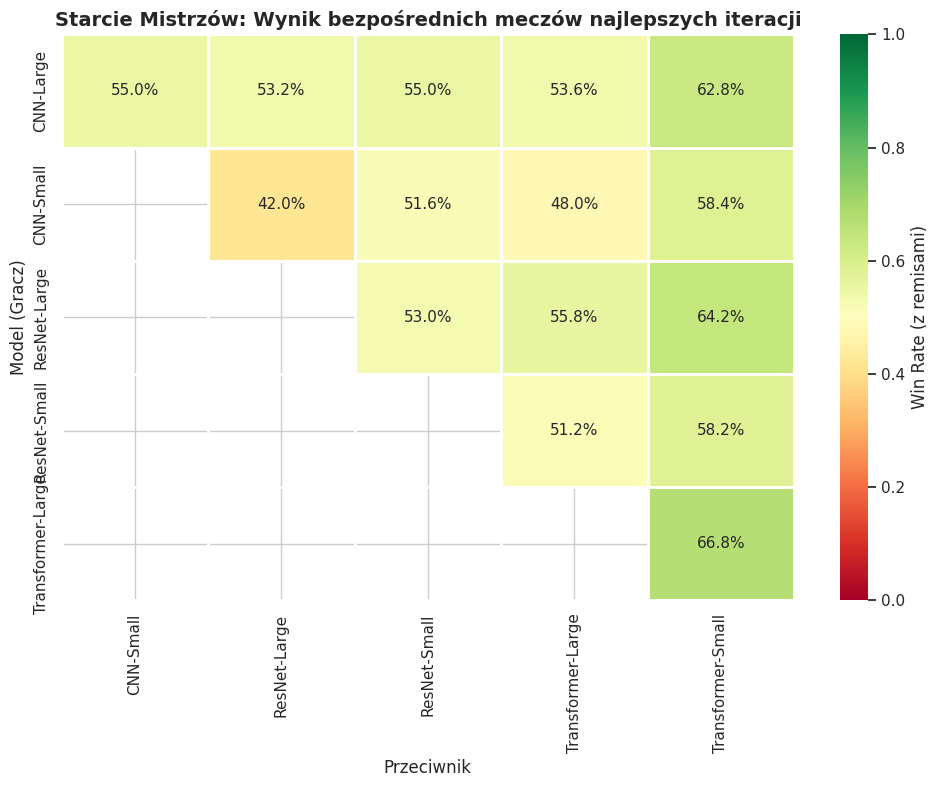

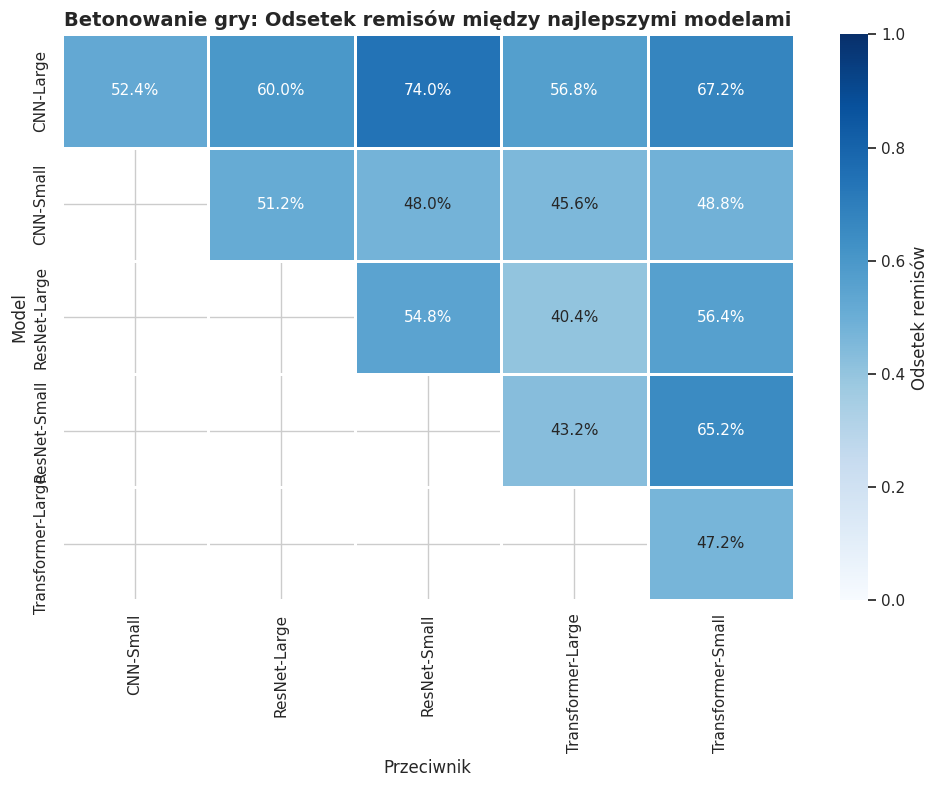

In [79]:
if not df_champions_matches.empty:
    # 6. HEATMAPA WYNIKÓW
    score_matrix = df_champions_matches.pivot_table(
        index="p1_cat", columns="p2_cat", values="player1_score", aggfunc="mean"
    )
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        score_matrix,
        annot=True,
        fmt=".1%",
        cmap="RdYlGn",
        center=0.5,
        vmin=0.0,
        vmax=1.0,
        cbar_kws={"label": "Win Rate (z remisami)"},
        linewidths=1,
        linecolor="white",
    )
    plt.title(
        "Starcie Mistrzów: Wynik bezpośrednich meczów najlepszych iteracji",
        fontsize=14,
        fontweight="bold",
    )
    plt.ylabel("Model (Gracz)", fontsize=12)
    plt.xlabel("Przeciwnik", fontsize=12)
    plt.tight_layout()
    plt.savefig("heatmap_score_champions.png")
    plt.show()

    # 7. HEATMAPA REMISÓW
    draw_matrix = df_champions_matches.pivot_table(
        index="p1_cat", columns="p2_cat", values="draw_rate", aggfunc="mean"
    )
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        draw_matrix,
        annot=True,
        fmt=".1%",
        cmap="Blues",
        vmin=0,
        vmax=1.0,
        cbar_kws={"label": "Odsetek remisów"},
        linewidths=1,
        linecolor="white",
    )
    plt.title(
        "Betonowanie gry: Odsetek remisów między najlepszymi modelami",
        fontsize=14,
        fontweight="bold",
    )
    plt.ylabel("Model", fontsize=12)
    plt.xlabel("Przeciwnik", fontsize=12)
    plt.tight_layout()
    plt.savefig("heatmap_draws_champions.png")
    plt.show()
else:
    print("Brak danych o meczach mistrzów do heatmap.")